### PCA

In [1]:
from sklearn.decomposition import PCA

### 矩阵分解：不损失或损失少量信息达到降维目的，PCA与SVD是两种不同的降维算法.
降维：1.输入原数据（m，n）,找出n维向量形成的n维空间；2.确定降维后的特征数k；3.通过某种变换变成一个新的n维空间V保存到components_中；4.找出原始数据在新特征空间V上对应的值，映射到新空间中形成新的特征；5.选取前k个信息量最大的特征删除其他特征

#### PCA是将方差作为信息量的指标，找到的新的k个特征叫做主成分

#### SVD用奇异值分解来找出空间V，信息量是奇异值

In [2]:
import matplotlib.pyplot  as plt
from sklearn.datasets import load_iris#鸢尾花数据集
from sklearn.decomposition import PCA

In [3]:
iris=load_iris()
iris.data.shape

(150, 4)

In [7]:
x=iris.data
y=iris.target

In [4]:
import pandas as pd
import numpy as np
pd.DataFrame(x).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1).head()

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### n_components 保留特征数量；不填默认保留原有特征数量,填写"mle"为自动索取最大似然估计；填写【0，1】之间的数x再加入参数svd_solver ='full'为PCA选出保留信息量大于x的特征数量

In [6]:
pca = PCA(n_components=2) #实例化，保留两个特征
pca = pca.fit(x) #拟合模型
X = pca.transform(x)
X.shape

(150, 2)

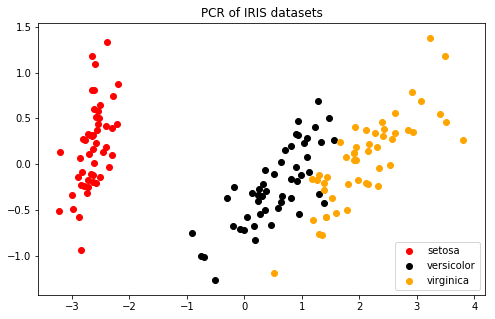

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(X[y==0,0],X[y==0,1],c='red',label=iris.target_names[0])
plt.scatter(X[y==1,0],X[y==1,1],c='black',label=iris.target_names[1])
plt.scatter(X[y==2,0],X[y==2,1],c='orange',label=iris.target_names[2])
plt.legend()
plt.title('PCR of IRIS datasets')
plt.show()

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
pca.explained_variance_ #PCA的新特征的特征量

array([4.22824171, 0.24267075])

In [10]:
pca.explained_variance_ratio_ #查看降维后新取的特征向量所占的信息量占原始数据信息量的百分比，又叫做解释方差贡献率

array([0.92461872, 0.05306648])

In [11]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [12]:
pca_ = PCA() #实例化，保留变换后所以特征
pca_ = pca_.fit(x) #拟合模型
pca_.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

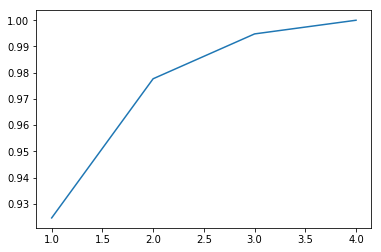

In [13]:
plt.plot([1,2,3,4],np.cumsum(pca_.explained_variance_ratio_))#np.cumsum()累加
plt.show()

In [14]:
(pca_.explained_variance_ratio_).cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [15]:
pca_ = PCA(n_components="mle") #实例化，最大似然估计自然选参保留变换后特征
XX_ = pca_.fit_transform(x) #拟合模型
XX_.shape

(150, 3)

In [16]:
pca_.explained_variance_ratio_.sum()

0.9947878161267247

In [17]:
pca_f=PCA(n_components=0.99,svd_solver='full')
pca_f.fit_transform(x).shape

(150, 3)

In [20]:
PCA(n_components=2).fit(x).components_ #查看新特征空间V(k,n),XV就是新特征矩阵

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [19]:
PCA(n_components=2).fit(x).components_.shape

(2, 4)

#### svd_solver 与 random_state

### components_:人脸识别的运用

In [11]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [12]:
face  =  fetch_lfw_people(min_faces_per_person=60) #每个人取60张图片
face

{'data': array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
           1.6666666 ,   0.33333334],
        [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
         243.        , 238.33333   ],
        [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
         194.33333   , 241.        ],
        ...,
        [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
         147.        , 141.66667   ],
        [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
         176.33333   , 161.        ],
        [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
          42.        ,  69.666664  ]], dtype=float32),
 'images': array([[[138.        , 135.66667   , 127.666664  , ...,  69.        ,
           68.333336  ,  67.333336  ],
         [146.        , 139.33333   , 125.        , ...,  68.333336  ,
           67.666664  ,  67.333336  ],
         [150.        , 138.33333   , 124.333336  , ...,  68.333336  ,
           67

In [13]:
face.images.shape

(1348, 62, 47)

In [14]:
x=face.data
face.data.shape

(1348, 2914)

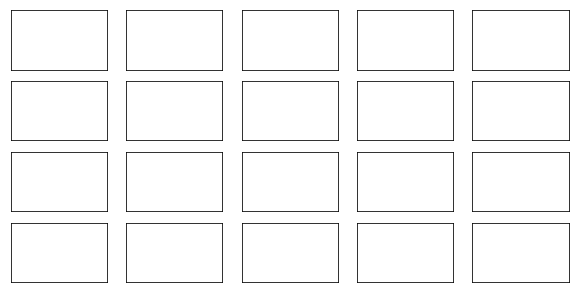

In [15]:
fig,axes=plt.subplots(4,5,figsize=(10,5)
                      ,subplot_kw={"xticks":[],"yticks":[]})#subplot_kw={"xticks"=[],"yticks"=[]}表示坐标轴什么也不写

In [10]:
axes.shape

(4, 5)

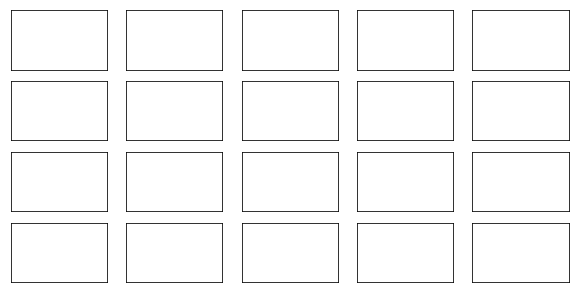

In [11]:
fig

In [13]:
[*axes.flat]

In [15]:
[*enumerate(axes.flat)]

[(0, <matplotlib.axes._subplots.AxesSubplot at 0x1eb66ce6c50>),
 (1, <matplotlib.axes._subplots.AxesSubplot at 0x1eb673b7cc0>),
 (2, <matplotlib.axes._subplots.AxesSubplot at 0x1eb673ea390>),
 (3, <matplotlib.axes._subplots.AxesSubplot at 0x1eb67412a20>),
 (4, <matplotlib.axes._subplots.AxesSubplot at 0x1eb67444128>),
 (5, <matplotlib.axes._subplots.AxesSubplot at 0x1eb6746b780>),
 (6, <matplotlib.axes._subplots.AxesSubplot at 0x1eb67492e10>),
 (7, <matplotlib.axes._subplots.AxesSubplot at 0x1eb674c34e0>),
 (8, <matplotlib.axes._subplots.AxesSubplot at 0x1eb674e9b70>),
 (9, <matplotlib.axes._subplots.AxesSubplot at 0x1eb67519240>),
 (10, <matplotlib.axes._subplots.AxesSubplot at 0x1eb675418d0>),
 (11, <matplotlib.axes._subplots.AxesSubplot at 0x1eb67569f60>),
 (12, <matplotlib.axes._subplots.AxesSubplot at 0x1eb67596630>),
 (13, <matplotlib.axes._subplots.AxesSubplot at 0x1eb675bdcc0>),
 (14, <matplotlib.axes._subplots.AxesSubplot at 0x1eb675ef390>),
 (15, <matplotlib.axes._subplots.Ax

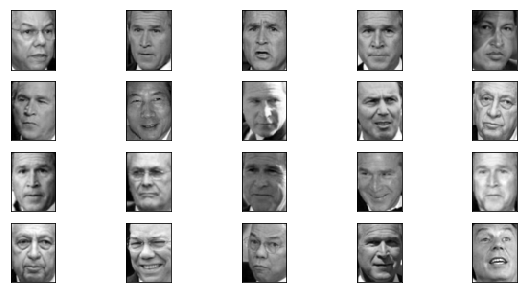

In [20]:
fig,axes=plt.subplots(4,5,figsize=(10,5)
                      ,subplot_kw={"xticks":[],"yticks":[]})#subplot_kw={"x_ticks"=[],"y_ticks"=[]}表示坐标轴什么也不写
for i,ax in enumerate(axes.flat):
    ax.imshow(face.images[i,:,:],cmap="gray")#cramp="gray"选择灰色模式

In [27]:
pca = PCA(150).fit(x)
x_ = pca.transform(x)
V = pca.components_
V.shape

(150, 2914)

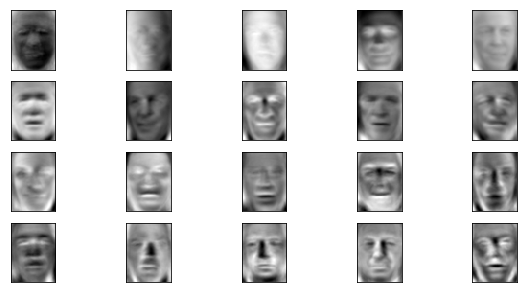

In [26]:
#可视化V
fig,axes=plt.subplots(4,5,figsize=(10,5)
                      ,subplot_kw={"xticks":[],"yticks":[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(62,47),cmap="gray") #V可视化虽然模糊但可以分析出提取出来的主要特征是嘴巴，鼻子，眼睛等位置

In [30]:
#打分
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor  as RFC
cross_val_score(RFC(n_estimators=20,random_state=0),x,face.target,cv=10).mean()

array([0.51485324, 0.46380856, 0.4080744 , 0.30218868, 0.51655198,
       0.45739496, 0.51745008, 0.54659596, 0.50003842, 0.54988128])

#### PCA的返回矩阵: inverse_transform

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [23]:
pca=PCA(n_components=150)
X=pca.fit_transform(fetch_lfw_people(min_faces_per_person=60).data)
X.shape

(1348, 150)

In [26]:
X_=pca.inverse_transform(X)
X_.shape

(1348, 2914)

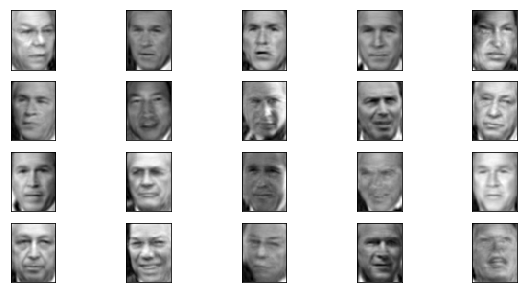

In [38]:
fig,axes=plt.subplots(4,5,figsize=(10,5)
                      ,subplot_kw={"xticks":[],"yticks":[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(X_[i,:].reshape(62,47),cmap="gray") #有数据损失,降维不可逆

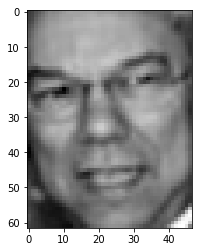

In [37]:
plt.imshow(fetch_lfw_people(min_faces_per_person=60).data[165,:].reshape(62,47),cmap="gray")

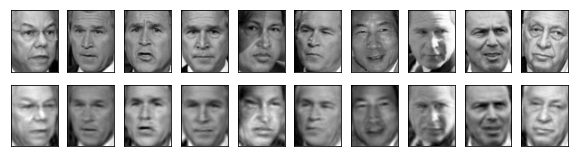

In [50]:
fig,ax=plt.subplots(2,10,figsize=(10,2.5),subplot_kw={"xticks":[],"yticks":[]})
for i in range(10):
    ax[0,i].imshow(face.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_[i,:].reshape(62,47),cmap="binary_r")

In [42]:
X_[i,:].reshape(62,47)

array([[ 1.2515941e+02,  1.2538084e+02,  1.2703154e+02, ...,
         6.8364059e+01,  7.3803391e+01,  7.8007050e+01],
       [ 1.2785651e+02,  1.2848746e+02,  1.2894162e+02, ...,
         6.7383789e+01,  7.3674301e+01,  7.7453667e+01],
       [ 1.3232213e+02,  1.3320645e+02,  1.3134799e+02, ...,
         6.8026543e+01,  7.2095161e+01,  7.3687851e+01],
       ...,
       [ 1.5083658e+02,  1.5408267e+02,  1.4103584e+02, ...,
         1.1369629e+00, -8.1748199e-01, -6.3636780e-01],
       [ 1.5196490e+02,  1.6053090e+02,  1.5285330e+02, ...,
         9.9309845e+00,  4.6229324e+00,  5.1597595e-02],
       [ 1.4723663e+02,  1.5698941e+02,  1.5505396e+02, ...,
         9.3123550e+00,  2.1878967e+00, -1.7932892e+00]], dtype=float32)

#### 用PCA做噪音过滤:PCA降维基本保留有效特征，再通过inverse_transform升维就会达到消除噪音的效果

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

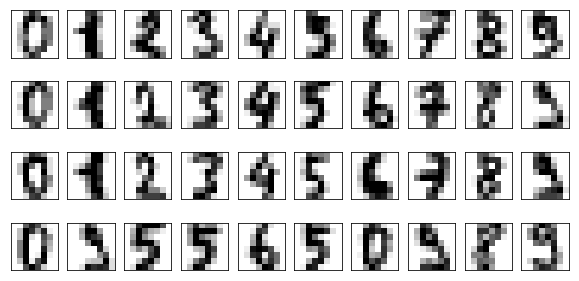

In [3]:
def plot_digits(data):
    fig,ax=plt.subplots(4,10,figsize=(10,5),subplot_kw={"xticks":[],"yticks":[]})
    for i,axes in enumerate(ax.flat):
        axes.imshow(data[i].reshape(8,8),cmap='binary')
plot_digits(digits.data)

In [4]:
# 制造噪音
rng=np.random.RandomState(42)#规定随机模式
noisy=rng.normal(digits.data,2)#以digits.data的各个元素为均值方差为2，得到一份与digits.data格式相同的加上噪音的数据
noisy.shape

(1797, 64)

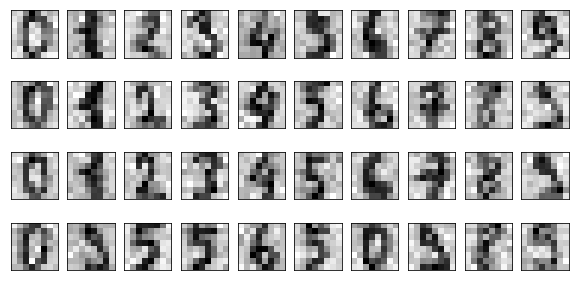

In [5]:
plot_digits(noisy)

(1797, 21)


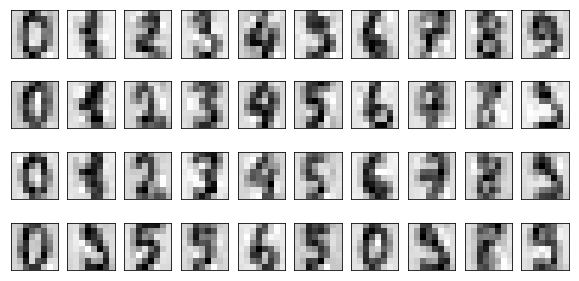

In [8]:
#噪音处理后，并画图
pca=PCA(0.8,svd_solver="full").fit(noisy)
X_dr=pca.transform(noisy)
print(X_dr.shape)
X_X=pca.inverse_transform(X_dr)
plot_digits(X_X)

### 案例 :PCA降维

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as RFC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
data = open(r'D:\数据分析题目\数据集\03数据预处理和特征工程\digit recognizor.csv')
data = pd.read_csv(data)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data.iloc[:,1:]
Y=data.iloc[:,0]

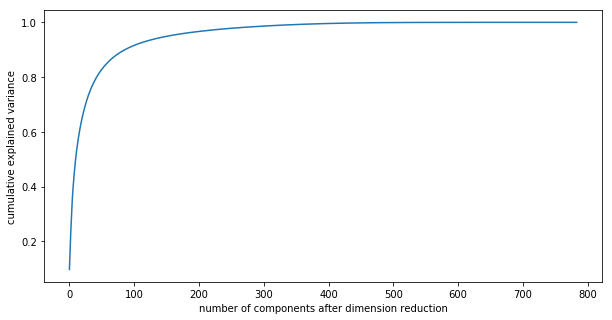

In [5]:
pca_line=PCA().fit(X)
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()

-0.0708560839039333
0.8016975928255293
0.8376373748895855
0.8405186535815787
0.836690207482454
0.8365984707593906
0.8334341447312832
0.8320282728409948
0.8297658061812421
0.8302383845219108


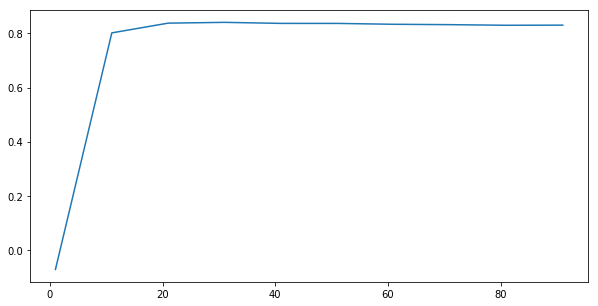

In [6]:
score_list=[]
for i in range(1,101,10):
    pca = PCA(n_components=i).fit(X)
    X_ = pca.transform(X)
    scores=cross_val_score(RFC(n_estimators=10,random_state=0),X_,Y,cv=5).mean()#树建立多了，运行缓慢,先只建十棵
    print(scores)
    score_list.append(scores)
plt.figure(figsize=(10,5))
plt.plot(range(1,101,10),score_list)
plt.show()

0.8360343184056191
0.8376982453373533
0.8373463351077376
0.8417745666493952
0.8421564791089796
0.8411427555095828
0.8398236887339856
0.8415815693122971
0.8399835802267479
0.8414996983983167
0.8396888587072219


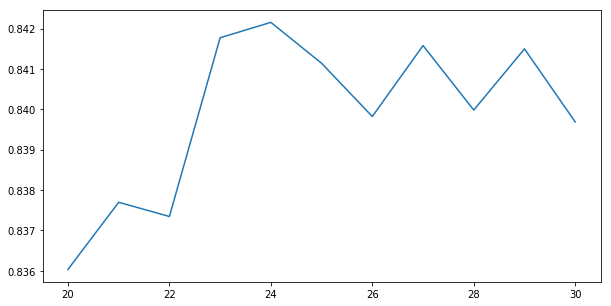

In [8]:
score_list_=[]
for i in range(20,31):
    pca = PCA(n_components=i).fit(X)
    X_ = pca.transform(X)
    sc=cross_val_score(RFC(n_estimators=10,random_state=0),X_,Y,cv=5).mean()
    print(sc)
    score_list_.append(sc)
plt.figure(figsize=(10,5))
plt.plot(range(20,31),score_list_)
plt.show()#24个特征效果最显著

In [9]:
data_P = PCA(n_components=24).fit_transform(X)
cross_val_score(RFC(n_estimators=100,random_state=0),data_P,Y,cv=10).mean()#随机森林只有  调参可能也效果不大，尝试降维后的KNN

0.8653541863589848

In [14]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),data_P,Y,cv=5).mean()

0.9702380952380952

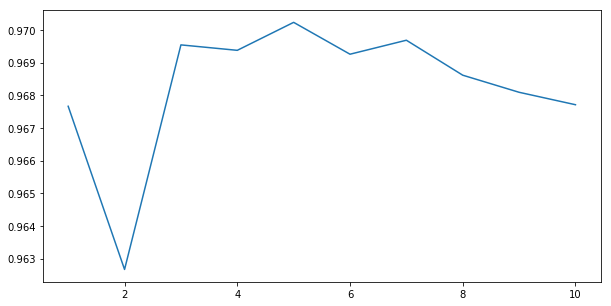

In [15]:
#画KNN的学习曲线
score_KNN=[]
for i in range(1,11,1):
    once = cross_val_score(KNN(i),data_P,Y,cv=5).mean()
    score_KNN.append(once)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),score_KNN)
plt.show()

In [16]:
cross_val_score(KNN(5),data_P,Y,cv=5).mean()

0.9702380952380952